# ImageGrid

This script will make a grid of png files to quickly visualize many photos at once. It is intended to be used on microscopy photos that have been processed by ND2toPNG_FIJI_Macro.ijm, this Fiji macro opens all ND2 files in a directory, creates a max z projection, then saves png files of the merged color channels and the color channels individually. The following script will go into that directory, and make a grid of all the images. When it runs the user will be prompted to input the number of color channels (if you excluded one of these channels in the fiji macro do not include it here, so if you had 3 colors including DAPI but excluded that in the fiji macro, only say you have 2 colors here). Enter the brightness factor for each channel (it will ask you for channels 1 through channels 4, just put 1 if it asks for channels you don't have or are excluded.) Then it will ask for the brightness factor for the merged image. Then the title you wish for the image grid. Then it will ask for the directory, choose the directory containing all the png files, make sure there are no other jpeg or png files in this directory, or they will be included in the grid.

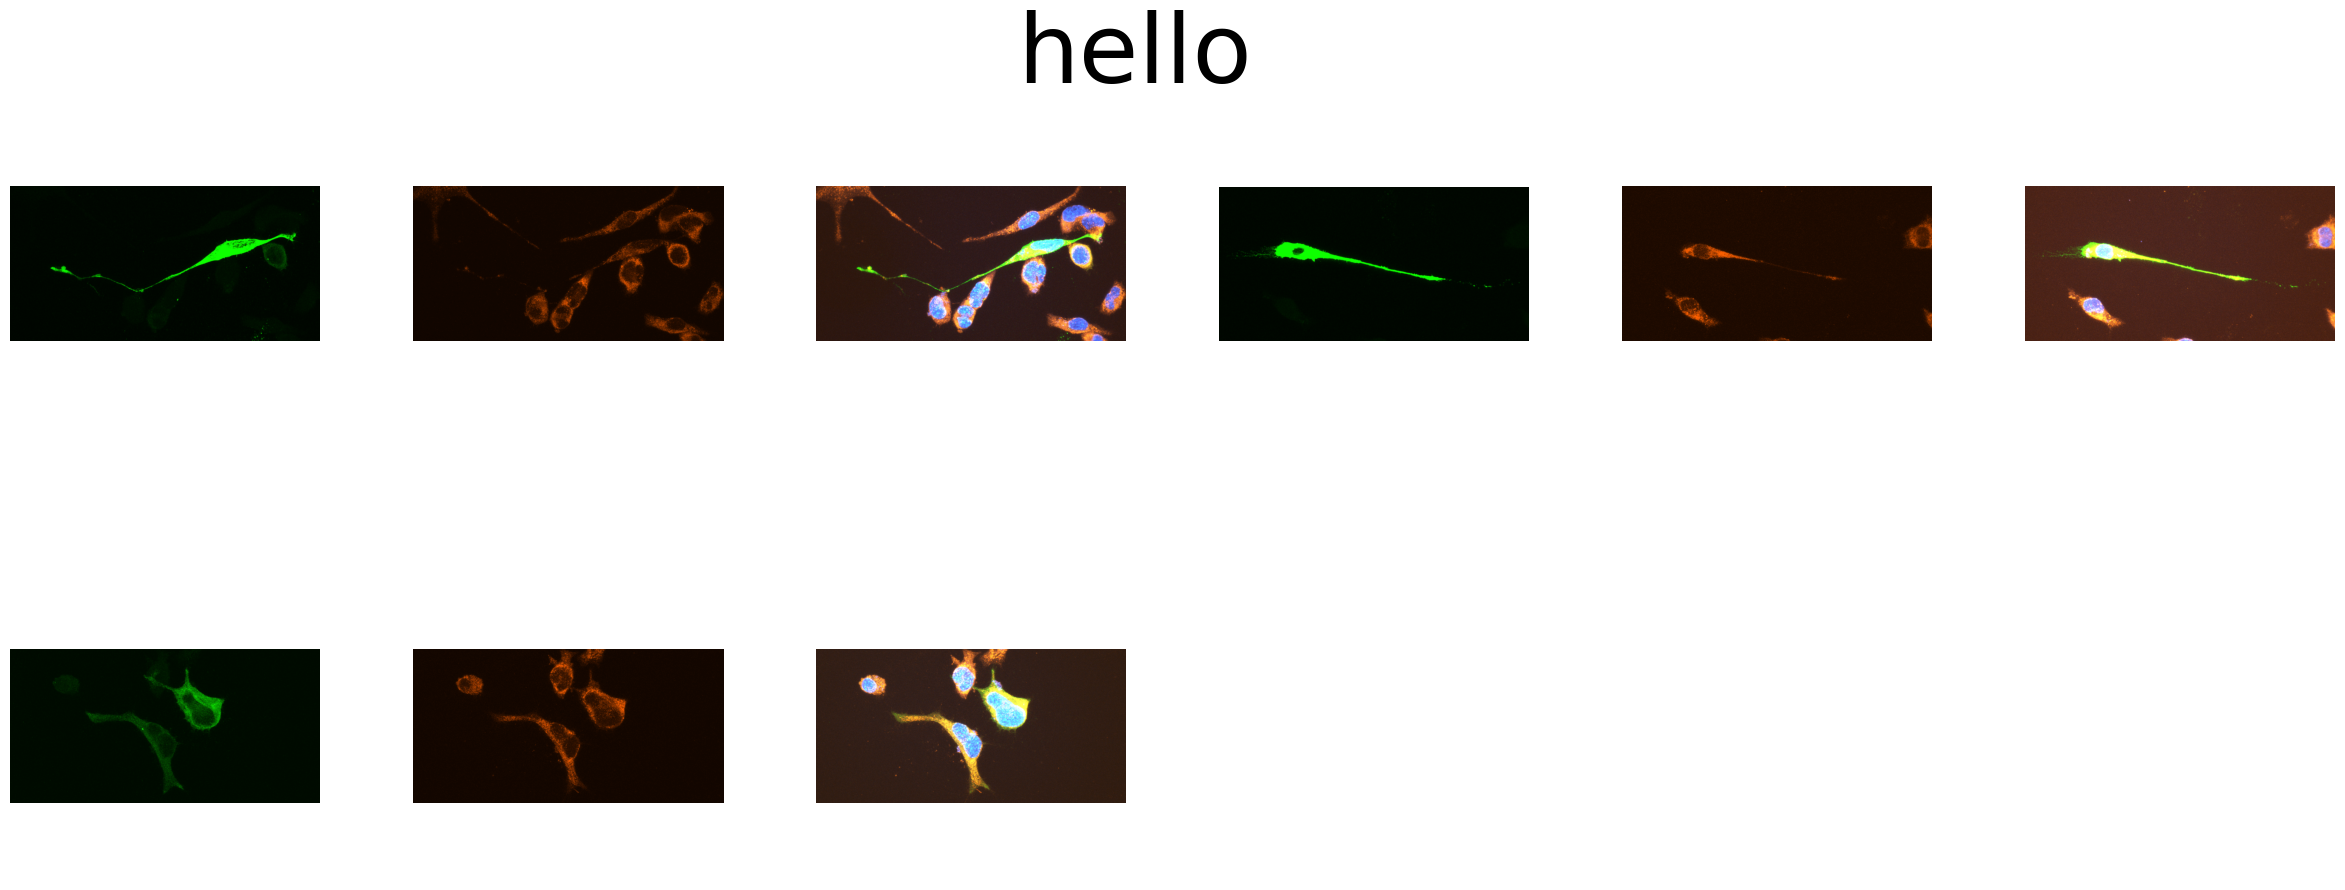

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images to 1024x1024
def resize_function_square(image):
    return image.resize((1024, 1024), Image.BICUBIC)

# Function to resize images to 1024x512
def resize_function_rectangle(image):
    return image.resize((1024, 512), Image.BICUBIC)

# Function to resize images based on their aspect ratio
def resize_images(images_dir, C1=1, C2=1, C3=1, C4=1, merge=1):
    resized_images = []
    resize_functions = []  # Keep track of which resize function was used for each image
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)

            #Adjust brightness for certain channels
            if "C1" in filename:
                img = adjust_brightness(img, C1)

            if "C2" in filename:
                img = adjust_brightness(img, C2)

            if "C3" in filename:
                img = adjust_brightness(img, C3)

            if "C4" in filename:
                img = adjust_brightness(img, C4)
           
            if "merge" in filename:
                img = adjust_brightness(img, merge)

            if img.width == img.height:
                resized_img = resize_function_square(img)
                resize_functions.append("square")
            else:
                resized_img = resize_function_rectangle(img)
                resize_functions.append("rectangle")
            resized_images.append(resized_img)
    return resized_images, resize_functions

# Function to adjust brightness of an image
def adjust_brightness(image, brightness_factor):
    # Adjust brightness here, example: increase by 20
    return image.point(lambda p: p * brightness_factor)

# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, resize_functions, images_dir, num_cols=6, title="Image Grid"):

    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 30
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            resize_function = resize_functions[i]
            ax.imshow(img)
            ax.axis('off')
            if resize_function == "square":
                ax.set_aspect('auto')  # Set aspect ratio to 'auto' for square images
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    
    fig.suptitle(title, fontsize=70, wrap=True)  # Enable text wrapping for the title
    save_path = os.path.join(images_dir, title+".pdf")
    plt.savefig(save_path)


# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():

    numberOfChannels = int(input("Enter the number of color channels included: "))

    C1 = int(input("Enter the brightness factor for channel 1: "))
    C2 = int(input("Enter the brightness factor for channel 2: "))
    C3 = int(input("Enter the brightness factor for channel 3: "))
    C4 = int(input("Enter the brightness factor for channel 4: "))

    merge = int(input("Enter the brightness factor for the merged image: "))

    user_title = input("Enter the title for the images: ")

    images_dir = ask_directory()

    if images_dir:
        resized_images, resize_functions = resize_images(images_dir, C1, C2, C3, C4, merge)
        if numberOfChannels == 3:
            plot_images(resized_images, resize_functions, images_dir, title=user_title, num_cols=4)
        elif numberOfChannels == 4:
            plot_images(resized_images, resize_functions, images_dir, title=user_title, num_cols=5)  
        else:
            plot_images(resized_images, resize_functions, images_dir, title=user_title)  
if __name__ == "__main__":
    main()

